## Berechnung eines Steinschlags an der Kantonsstrasse in Fiersch (Kt. GR) 
   In der folgenden Berechnung wird anhand der Daten der letzten drei Monate die Wahrscheinlichkeit 
   berechnet für einen tödlichen Steinschlag und basierend auf den Erkentnissen der Berechnungen ob die Strassen gesperrt werden muss oder nicht.
   Wird die Strasse gesperrt wird untersucht ob diese den ganzen Tag gesperrt bleibt oder nur für eine gewisse Zeit am Tag

### Annahmen:
1. Die Ablösungszonen 1 und 2 befinden sich an zwei verschiedenen Stellen
2. Die Steine aus den beiden Ablösungszonen werden mit dem gleichen Netz aufgefangen
3. Die Wahrscheinlichkeiten werden pro Stundenfenster berechnet und nicht pro Minute
4. TBD Verkehr

### Berechnungsmodel:
# TBD


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import scipy.stats as stats


## 1. Daten einlesen, säubern und in eine einheitliche Form bringen.

In [103]:
# Daten laden

raw_data_1 = pd.read_csv("out_1.csv")
raw_data_2 = pd.read_csv("out_2.csv")

In [104]:
# Überprüfen wie viele "NA" Werte noch vorhanden sind
raw_data_1.isna().sum()

Datum                    11
Uhrzeit                  11
Masse [kg]               11
Geschwindigkeit [m/s]    11
Unnamed: 4               79
                         ..
Unnamed: 72              79
Unnamed: 73              79
Unnamed: 74              79
Unnamed: 75              79
Unnamed: 76              79
Length: 77, dtype: int64

In [105]:
raw_data_2.isna().sum()

Date            3
Uhrzeit         3
m [kg]          3
v [m/s]         3
Unnamed: 4     35
Unnamed: 5     35
Unnamed: 6     35
Unnamed: 7     35
Unnamed: 8     35
Unnamed: 9     35
Unnamed: 10    35
Unnamed: 11    35
Unnamed: 12    35
Unnamed: 13    35
Unnamed: 14    35
Unnamed: 15    35
Unnamed: 16    35
Unnamed: 17    35
Unnamed: 18    35
Unnamed: 19    35
Unnamed: 20    35
Unnamed: 21    35
Unnamed: 22    35
Unnamed: 23    35
Unnamed: 24    35
Unnamed: 25    35
Unnamed: 26    35
Unnamed: 27    35
Unnamed: 28    35
Unnamed: 29    35
Unnamed: 30    35
dtype: int64

In [106]:
# Alle Zeilen löschen die in ALLEN Zellen keine Werte haben

data_1_no_rows = raw_data_1.dropna(how='all')
data_2_no_rows = raw_data_2.dropna(how='all')

# Alle Kolonen löschen die NA Werte enthalten

data_1_no_na = data_1_no_rows.dropna(axis= 'columns')
data_2_no_na = data_2_no_rows.dropna(axis= 'columns')



In [107]:
#Um eine Vergleichbarkeit von Daten herstellen zu können sollte die Benennung der Zellen die selbe sein

data_stelle_1= data_1_no_na.rename(columns= {'Datum':'Date',
                                             'Uhrzeit': 'Time',
                                             'Masse [kg]' : 'Masse in kg' ,
                                             'Geschwindigkeit [m/s]' : 'Speed in m/s' 
                                            })

In [108]:
data_stelle_2= data_2_no_na.rename(columns= {'Uhrzeit': 'Time',
                                             'm [kg]' : 'Masse in kg' ,
                                             'v [m/s]' : 'Speed in m/s' 
                                            })

In [133]:
# Überprüfen wie viele "NA" Werte noch vorhanden sind nachdem auch die Anpassung der Benennungen durchgeführt worden ist
data_stelle_1.isna().sum()

Date            0
Time            0
Masse in kg     0
Speed in m/s    0
dtype: int64

In [134]:
data_stelle_2.isna().sum()

Date            0
Time            0
Masse in kg     0
Speed in m/s    0
dtype: int64

## 2. Hinzufügen und Berechnung von fehlenden Daten, welche abhängig sind von den existierenden

In [111]:
# Hinzufügen des Stundenfensters in dem sich die Ablösung ereignet hat
data_stelle_1 ['t_Ablösung'] = pd.to_datetime (data_stelle_1['Time']).dt.hour
data_stelle_2 ['t_Ablösung'] = pd.to_datetime (data_stelle_2['Time']).dt.hour

## 3. Datenanalyse - Welche Verteilung liegt in den einzelnen Datensätzen vor?
Vorgehen: Zuerst werden Histogramme der einzelnen Variabeln erstellet und im zweiten Schritt ein QQ Plot.   
Um zu überprüfen welche Verteilung den vorhergegangenen Histogrammen zugrunde liegt, 
werden im nächsten Schritt QQ-Plots erstellt um eine visuelle Überprüfung einer Normalverteilung vorzunehmen.

#### Masse Ablösestelle 1

In [112]:
# Analyse 
data_stelle_1['Masse in kg'].describe()

count      68.000000
mean      628.632353
std       695.884703
min        12.000000
25%       214.750000
50%       402.500000
75%       773.000000
max      3104.000000
Name: Masse in kg, dtype: float64

Text(0.5, 0, 'Masse in kg')

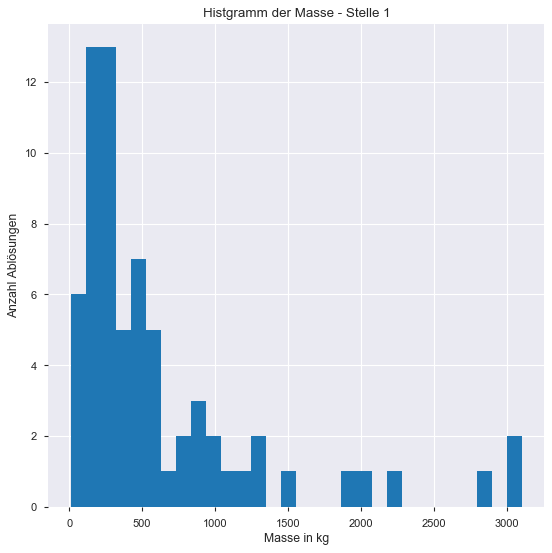

In [113]:
# Histogramm 
plt.figure(figsize=(8, 8), dpi=80)
plt.hist(data_stelle_1['Masse in kg'], bins = 30)

plt.title("Histgramm der Masse - Stelle 1")
plt.ylabel("Anzahl Ablösungen")
plt.xlabel("Masse in kg")   

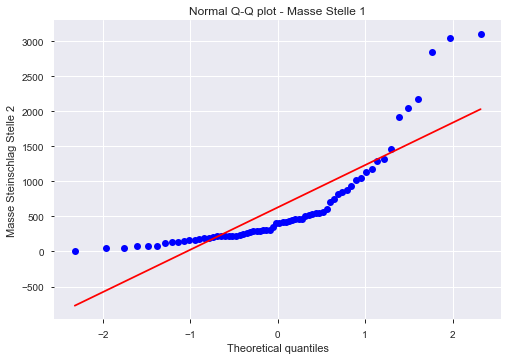

In [147]:
# QQ - Plot
stats.probplot(data_stelle_1['Masse in kg'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Masse Stelle 1")
plt.ylabel('Masse Steinschlag Stelle 2')
plt.show()

#### Masse Ablösestelle 2

In [115]:
# Analyse
data_stelle_2['Masse in kg'].describe()

count     32.000000
mean      99.250000
std      104.072555
min        0.000000
25%       36.750000
50%       58.000000
75%      140.000000
max      406.000000
Name: Masse in kg, dtype: float64

Text(0.5, 0, 'Masse in kg')

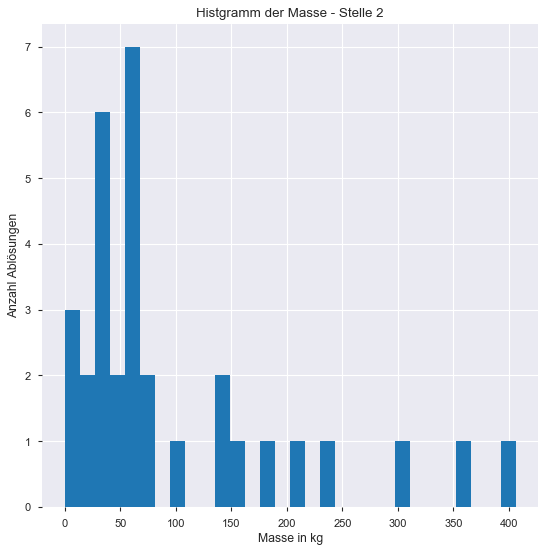

In [116]:
# Histogramm 
plt.figure(figsize=(8, 8), dpi=80)
plt.hist(data_stelle_2['Masse in kg'], bins = 30)

plt.title("Histgramm der Masse - Stelle 2")
plt.ylabel("Anzahl Ablösungen")
plt.xlabel("Masse in kg")   

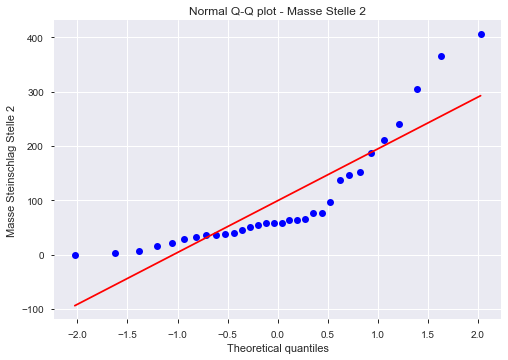

In [117]:
# QQ - Plot
stats.probplot(data_stelle_2['Masse in kg'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Masse Stelle 2")
plt.ylabel('Masse Steinschlag Stelle 2')
plt.show()

#### Geschwindigkeit Ablösestelle 1

Text(0.5, 0, 'Speed in m/s')

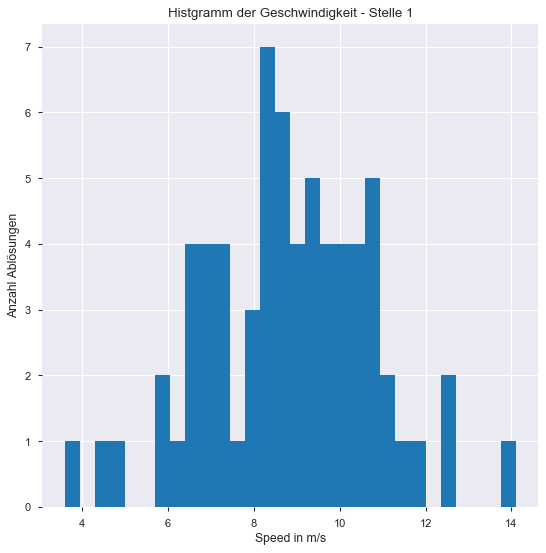

In [118]:
# Analyse
data_stelle_1['Speed in m/s'].describe()

# Histogramm 
plt.figure(figsize=(8, 8), dpi=80)
plt.hist(data_stelle_1['Speed in m/s'], bins = 30)

plt.title("Histgramm der Geschwindigkeit - Stelle 1")
plt.ylabel("Anzahl Ablösungen")
plt.xlabel("Speed in m/s")   

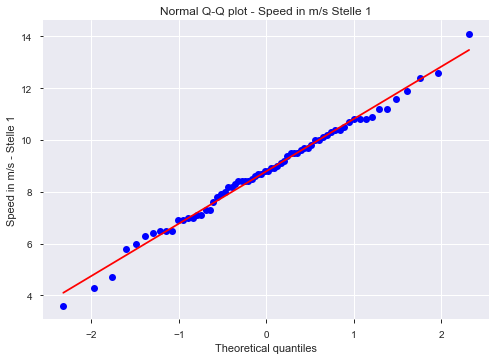

In [119]:
# QQ - Plot
stats.probplot(data_stelle_1['Speed in m/s'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Speed in m/s Stelle 1")
plt.ylabel('Speed in m/s - Stelle 1')
plt.show()

#### Geschwindigkeit Ablösestelle 2

Text(0.5, 0, 'Speed in m/s')

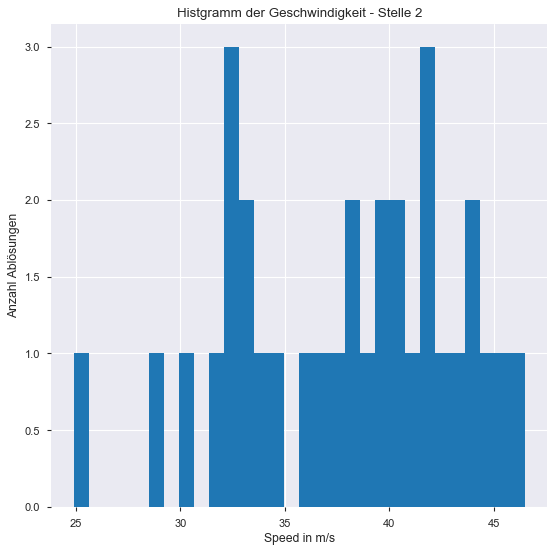

In [120]:
# Analyse 
data_stelle_2['Speed in m/s'].describe()
# Histogramm 
plt.figure(figsize=(8, 8), dpi=80)
plt.hist(data_stelle_2['Speed in m/s'], bins = 30)

plt.title("Histgramm der Geschwindigkeit - Stelle 2")
plt.ylabel("Anzahl Ablösungen")
plt.xlabel("Speed in m/s")   

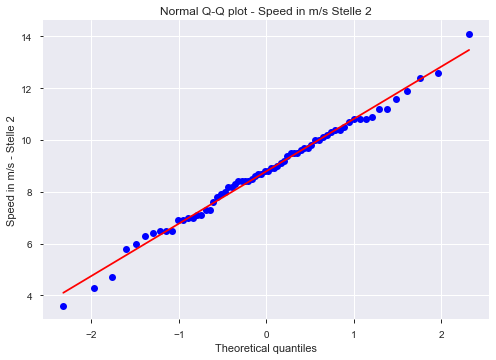

In [121]:
# QQ - Plot
stats.probplot(data_stelle_1['Speed in m/s'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Speed in m/s Stelle 2")
plt.ylabel('Speed in m/s - Stelle 2')
plt.show()






# Break



In [148]:
# Wenn nun das Format der einzelnen Zellen betrachtet wird, wird ersichtlich, dass die Zeit nicht als Zeit formatiert ist
data_stelle_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 4 columns):
Date            68 non-null object
Time            68 non-null object
Masse in kg     68 non-null float64
Speed in m/s    68 non-null float64
dtypes: float64(2), object(2)
memory usage: 2.7+ KB


In [ ]:
# Kovenrtierung der "Time" Spalte in Zeitformat


In [ ]:
# Nach der Transformation wurde die Spalte 'Time' in ein datetime object umgewandlet. 
# Bei der Umwandlung selber wurde das heutige Datum hinzugefügt
# In dieser Arbeit ergaben sich grössere Schwierigkeiten mit der Transformation des Datetime Objekts
data_stelle_1.info()

In [ ]:
data_stelle_2.info()

In [ ]:
data_stelle_1['Zeitfenster'].hist(bins=24, figsize=(12,8))
plt.title("Verteilung der Steinschläge auf die Zeit - Ablösestelle 1 ")
plt.xlabel("Uhrzeit - Zeinfenster")
plt.ylabel("Häufigkeit")

In [ ]:
data_stelle_2['Zeitfenster'].hist(bins=24, figsize=(12,8))
plt.title("Verteilung der Steinschläge auf die Zeit - Ablösestelle 2 ")
plt.xlabel("Uhrzeit - Zeinfenster")
plt.ylabel("Häufigkeit")

In [ ]:
all_data_clean['Zeitfenster'].hist(bins=24, figsize=(12,8))
plt.title("Verteilung der Steinschläge auf die Zeit - Alle Ablösestellen")
plt.xlabel("Uhrzeit - Zeinfenster")
plt.ylabel("Häufigkeit")

In [ ]:
# Berechnung der Wahrscheinlichkeiten einer Ablösung in einem bestimmten Zeitfenster
# Der Ereignisraum der Ablösungen sind alle möglichen Zeitfenster in den 3 Monaten = E

# Die Mächtigkeit von E = Tage im Monat (Januar + Februar + März) * 24
E = (31 + 28 + 31)*24
print (E)


In [ ]:
# An wie vielen der möglichen Zeitfenster gab es eine Ablösung? 
# Es ist nötig herauszufinden an welchem Zeitfesnteres mehrere Ablösungen gab

doppelte_einträge_1 = data_stelle_1[data_stelle_1.duplicated(['Date', 'Time'])]
print (doppelte_einträge_1, sep='\n')

In [ ]:
doppelte_einträge_2 = data_stelle_2[data_stelle_2.duplicated(['Date', 'Time'])]
print (doppelte_einträge_2, sep='\n')

In [ ]:
# Die Erkentniss aus den obigen Analysen zeigt, dass bei der Ablösestelle 1, 
# an zwei Zeitfenstern zwei Steine sich abgelöst haben. 
# An der Ablösestelle 2 gibt es keine solchen doppelten Zeitfenster

# Die Mächtigkeit der Ablösendenzeitfenster = Anzahl Beobachtungen - Anzahl doppelte Beobachtungen

# Mächtigkeit Ablösezeintefester 1 = 68 - 2 = 66
# Mächtigkeit Ablösezeintefester 2 = 32 - 0 = 32

# Erwartungswert, dass in einem Zeitfenster ein Stein sich löst = |Ablösezeitfenster| / |E|

Wahrscheinlichkeit_Ablösung_Zeitfenster_1 = 66 / 2160
print("Wahscheinlichkeit einer Ablösung in der Stelle 1 = " +str(Wahrscheinlichkeit_Ablösung_Zeitfenster_1))
Wahrscheinlichkeit_Ablösung_Zeitfenster_2 = 32 / 2160
print("Wahscheinlichkeit einer Ablösung in der Stelle 2 = " +str(Wahrscheinlichkeit_Ablösung_Zeitfenster_2))

In [ ]:
# Zählen der Ablösungen pro Zeitfenster

Ablösungen = pd.pivot_table(all_data_clean, values = ['Date'], index=['Zeitfenster'],  aggfunc = 'count')

In [ ]:
Ablösungen ['P(Zeintfenster)'] = Ablösungen.Date.apply(lambda x: x/100/2160)

In [ ]:
Ablösungen

In [ ]:
all_data_clean.pdprof(style = {'full_width': True})

